In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\csv files\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["State"] = le.fit_transform(df["State"])
df["State"].head()

0    2
1    0
2    1
3    2
4    1
Name: State, dtype: int32

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [10]:
x = df.drop(columns="Profit")
y = df["Profit"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.4,
                                    random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.9533550269348674


In [14]:
print("model score:",lr.score(x,y))

model score: 0.9485303557687553


In [15]:
print("Model's Testing Accuracy:",lr.score(x_test,y_test))
print("Model's Training Accuracy:",lr.score(x_train,y_train))

Model's Testing Accuracy: 0.9533550269348674
Model's Training Accuracy: 0.9445212239677727


In [16]:
from sklearn.linear_model import Lasso
lasso_ = Lasso()
lasso_.fit(x_train,y_train)
y_pred2 = lasso_.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
print("R2 Score:",r2_score(y_test, y_pred2))

R2 Score: 0.9533550885394169


In [18]:
print("model score:",lasso_.score(x,y))

model score: 0.9485303807561661


In [19]:
print("Model's Testing Accuracy:",lasso_.score(x_test,y_test))
print("Model's Training Accuracy:",lasso_.score(x_train,y_train))

Model's Testing Accuracy: 0.9533550885394169
Model's Training Accuracy: 0.944521222979573


                 R&D Spend  Administration  Marketing Spend     State  \
R&D Spend         1.000000        0.241955         0.724248  0.104685   
Administration    0.241955        1.000000        -0.032154  0.011847   
Marketing Spend   0.724248       -0.032154         1.000000  0.077670   
State             0.104685        0.011847         0.077670  1.000000   
Profit            0.972900        0.200717         0.747766  0.101796   

                   Profit  
R&D Spend        0.972900  
Administration   0.200717  
Marketing Spend  0.747766  
State            0.101796  
Profit           1.000000  


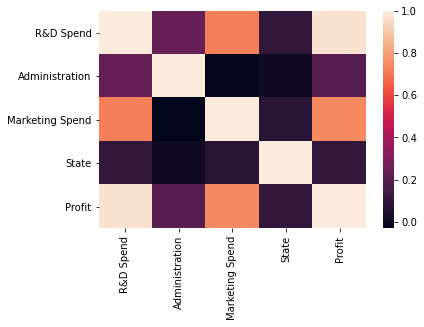

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
a = df.corr()
print(a)
hm = sns.heatmap(data=a)
plt.show()

In [21]:
x = np.array(df["Profit"])
y = np.array(df["Administration"])
x1 = np.array(df["Profit"])
y1 = np.array(df["R&D Spend"])
x2 = np.array(df["Profit"])
y2 = np.array(df["Marketing Spend"])
x3 = np.array(df["Profit"])
y3 = np.array(df["State"])

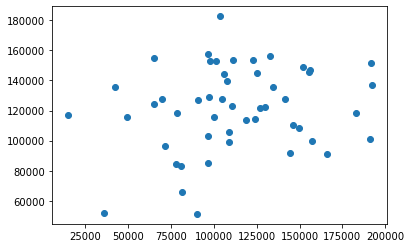

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

<AxesSubplot:>

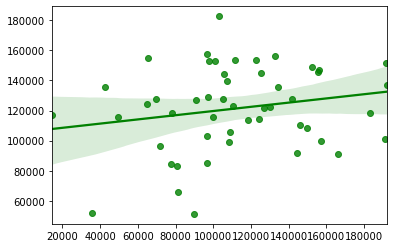

In [23]:
import seaborn as sns
sns.regplot(x,y,data = df,color='g')

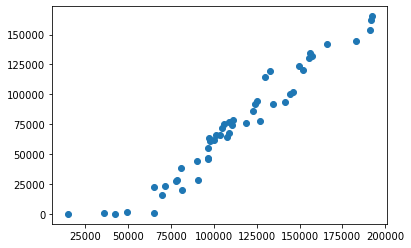

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x1,y1)
plt.show()

<AxesSubplot:>

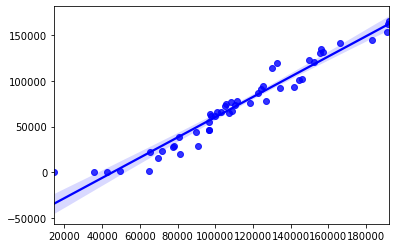

In [25]:
import seaborn as sns
sns.regplot(x1,y1,data = df,color='b')

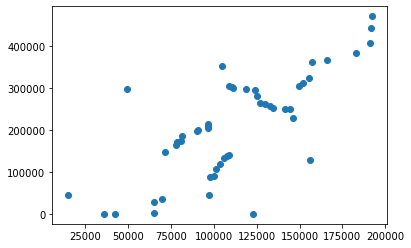

In [26]:
import matplotlib.pyplot as plt
plt.scatter(x2,y2)
plt.show()

<AxesSubplot:>

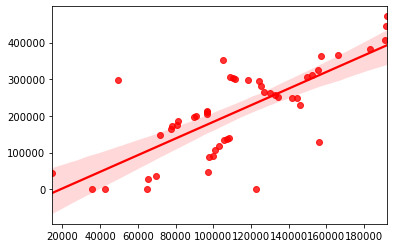

In [27]:
import seaborn as sns
sns.regplot(x2,y2,data = df,color='red')

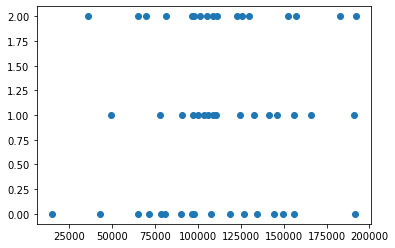

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x3,y3)
plt.show()

<AxesSubplot:>

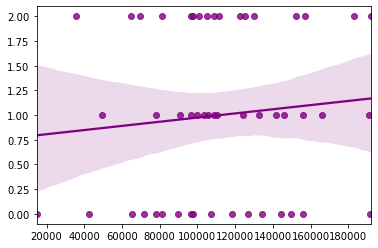

In [29]:
import seaborn as sns
sns.regplot(x3,y3,data = df,color='purple')

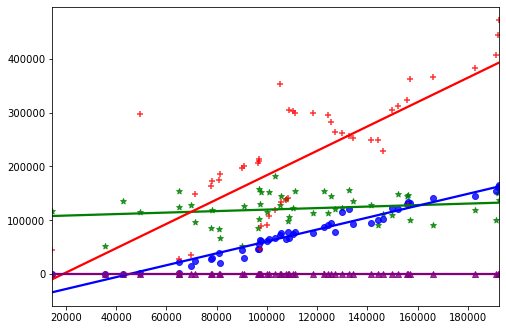

In [30]:
import seaborn as sns
axs = plt.subplots(figsize = (8,5.5))
sns.regplot(x,y,data = df,color='g',marker="*",ci=None)
sns.regplot(x1,y1,data = df,color='b',ci=None)
sns.regplot(x2,y2,data = df,color='red',marker="+",ci=None)
sns.regplot(x3,y3,data = df,color='purple',marker="^",ci=None)
plt.show()